# 07 딥 러닝 Deep Learning

### 01) 퍼셉트론 Perceptron

1. 퍼셉트론

  인공신경망, 다수의 입력으로 하나의 결과를 내보내는 알고리즘

  실제 뇌를 구성하는 신경세포 뉴런의 동작과 유사

  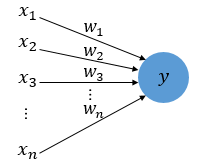

  x : 입력값

  y : 출력값

  w : 가중치 weight (클수록 해당 값이 중요하다.)

  -> 활성화 함수 : 뉴런에서 출력값 변경 시키는 함수

  ex. 계단 함수 step function : 입력값과 가중치의 곱의 전체 합이 임계치 thredhold 를 넘으면 인공 뉴런은 출력 신호로 1를 출력, 그렇지 않을 경우 0 출력

2. 단층 퍼셉트론 Single-Layer Perceptron

  값을 보내는 단계와 값을 받아 출력하는 두 단계로 이루어진다. (입력층, 출력층)

  AND, NAND, OR 게이트 구현 가능

  But, XOR 게이트 (입력값 두개가 서로 다른 값을 가질 때 출력값이 1) 구현 불가능 -> 직선 하나로 나누는 것이 불가능 하기 때문에

3. 다층 퍼셉트론 Multi-Layer Perceptron, MLP

  은닉층 hidden layer 존재

  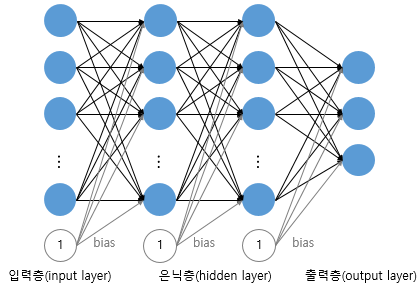

  - 심층 신경망 Deep Neural Network, DNN : 은닉층이 2개 이상인 신경망

### 2) 인공 신경망 Artificial Neural Network

1. 피드 포워드 신경망 Feed-Forward Neural Network, FFNN

  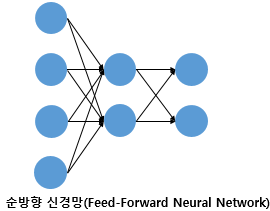

  피드 포워드 신경망 (순방향 신경망) : 그림과 같이 오직 입력층에서 출력층으로 연산이 전개되는 신경망

2. 전결합층 Fully-connected layer, FC, Dense layer : 어떤 층의 모든 뉴련이 이전 층의 모든 뉴런과 연결되어 있는 층

3. 활성화 함수 Activation Function

  은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수 (비선형 함수)

  - 계단 함수 Step function

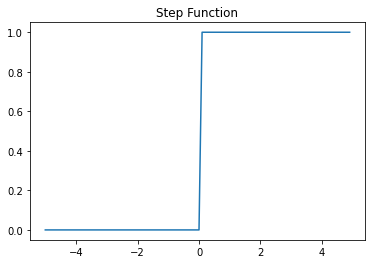

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

3. 시그모이드 함수 Sigmoid function 와 기울기 소실

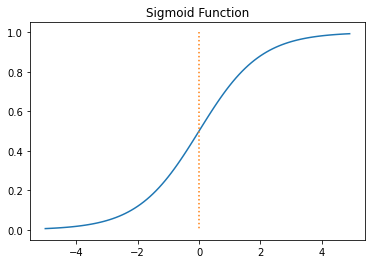

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

  - 기울기 소실 Vanishing Gradient : 가중치와 편향을 업데이트 하는 역전파 과정에서 0에 가까운 값이 누적해서 곱해지면 앞단에는 기울기가 잘 전달되지 않게 된다. 

4. 하이퍼볼릭탄젠트 함수 Hyperbolic tangent function 

  (기울기 소실이 적은 편)

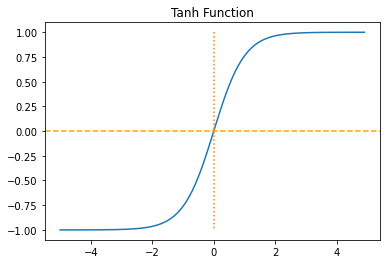

In [3]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

5. 렐루 함수 ReLU

  음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값 그대로를 반환한다.

- 죽은 렐루 dying ReLU : 입력값이 음수면 기울기도 음수가 되어 뉴런의 회생이 어렵게 된다.

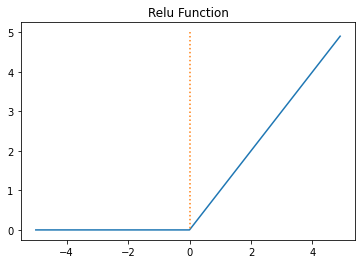

In [4]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

6. 리키 렐루 Leaky ReLU

  죽은 렐루 보완

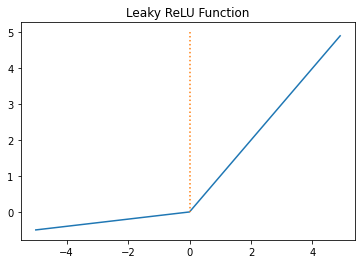

In [5]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

7. 소프트 맥스 함수 Sofymax function

  딥러닝으로 세 가지 이상 선택지 중 하나를 고르는 다중 클래스 분류 문제를 풀 경우 출력층에서 주로 사용한다. 

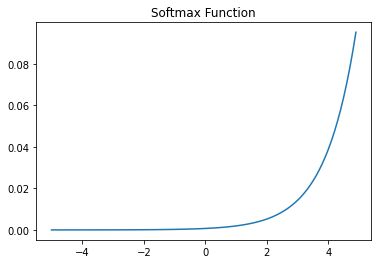

In [6]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

### 3) 행렬곱으로 이해하는 신경망

1. 순전파 Foward Propagation

  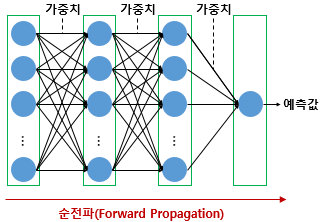

2. 행렬곱으로 순전파 이해하기

  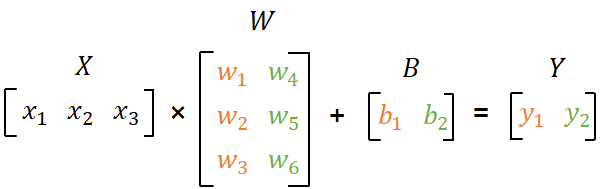

3. 행렬곱으로 병렬 연산 이해하기

  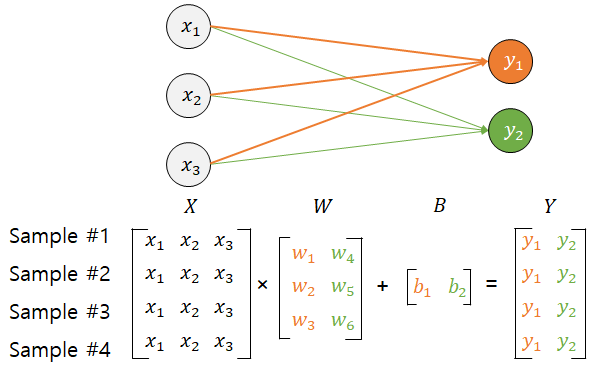

### 04) 딥러닝의 학습 방법

1. 손실 함수 Loss function

  실제값과 예측값의 차이 수치화해주는 함수 (회귀 : 평균 제곱 오차, 분류 : 크로스 엔트로피)

- 평균 제곱 오차 MSE 

```
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
```

- 이진 크로스 엔트로피 Binary Cross-Entropy

```
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
```

- 카테고르칼 크로스 엔트로피 Categorical Cross-Entropy

```
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
```

2. 배치 크기에 따른 경사 하강법

- 배치 : 가중치 등 매개변수의 값을 조정하기 위해 사용하는 데이터의 양

- 배치 경사 하강법 Batch Gradient Descent : 옵티마이저 중 하나, 오차를 구할 때 전체 데이터 고려 (에포크 1로 모든 매개변수 업데이트를 한번에 수행) -> 한 번 매개변수 업데이트에 시간 오래 걸리고, 메모리 크게 요구

```
model.fit(X_train, y_train, batch_size=len(X_train))
```

- 배치 크기가 1인 확률적 경사 하강법 Stochastic Gradient Descent, SGD : 매개변수가 값을 조정 시 랜덤으로 선택한 하나의 데이터에 대해서만 계산

```
model.fit(X_train, y_train, batch_size=128)
```

3. 옵티마이저 Optimizer

- 모멘텀 Momentum : 로컬미니멈에 빠지지 않도록 관성을 준다.

```
tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
```

- 아다그라드 Adagrad : 각 매개변수에 서로 다른 학습률 적용 (변화 많은 매개변수에 학습률 작게 적용)

```
tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)
```

- 알엠에스프롭 RMSprop : 아다그라드의 학습률 감소 단점 보완

```
tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)
```

- 아담 Adam : 모멘텀(방향) + 알엠메스프롭(학습률)

```
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
```

- 사용법

```
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
```

4. 역전파

  출력층 바로 이전의 은닉층을 N층이라고 하였을 때, 출력층과 N층 사이의 가중치를 업데이트하는 단계를 역전파 1단계, N층과 N층의 이전층 사이의 가중치를 업데이트 하는 단계를 역전파 2단계라고 한다. 

5. 에포크 Epochs 와 배치 크기 Batch size 와 이터레이션 Iteration

- 에포크 : 학습 횟수 (과적합, 과소적합 발생)

- 배치 크기 : 몇 개의 데이터 단위로 매개 변수 업데이트 하는 지 의미

- 이터레이션 (스텝 Step) : 한 번의 에포크를 끝내기 위해 필요한 배치 수

  ex. 전체 데이터가 2000일 때 배치 크기가 200이라면 이터레이션은 10

### 5) 과적합 Overfitting 을 막는 방법들

1. 데이터의 양 늘리기

2. 모델의 복잡도 줄이기

3. 가중치 규제 적용하기

4. 드롭아웃

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

max_words = 10000
num_classes = 46

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(num_classes, activation='softmax'))

### 06) 기울기 소실 Gradient Vanishing 과 폭주 Exploding

역전파 과정에서 입력층으로 갈 수록 기울기가 점차 사라지는 기울기 소실과 그 반대 경우인 기울기 폭주을 막기 위한 방법들

1. ReLU와 ReLU의 변형들

2. 그래디언트 클리핑 Gradient Clipping

  기울기 폭주를 막기 위해 임계값을 넘지 않도록 자른다.

```
Adam = optimizers.Adam(lr=0.0001, clipnorm=1.)
```

3. 가중치 초기화 Weight initialization

- 세이비어 초기화 Xavier Initialization : 균등 분포 Uniform Distribution 또는 정규 분포 Normal distribution 로 초기화

- He 초기화 : 세이비어의 ReLU 또는 그 변형 함수와 사용할 경우 성능이 좋지 않은 문제 해결 (ReLU + He 초기화 방법이 보편적)

4. 배치 정규화 Batch Normalization : 인공 신경망 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만든다. 

- 내부 공변량 변화 : 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상

- 배치 정규화 : 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해놓았다가 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고 구해놓았던 평균과 분산으로 정규화

 - 기울기 소실 문제 개선
 
 - 가중치 초기화 덜 민감
 
 - 큰 학습률 사용으로 학습 속도 개선

 - 미니 배치마다 평균과 표준편차를 계산하여 사용하므로 훈련 데이터에 일종의 잡음 주입의 부수 효과로 과적합을 방지하는 효과 (드롭아웃과 비슷한 효과)

- 배치 정규화 한계 : 미니 배치 크기에 의존적, RNN에 적용 어려움

5. 층 정규화 Layer Normalization

  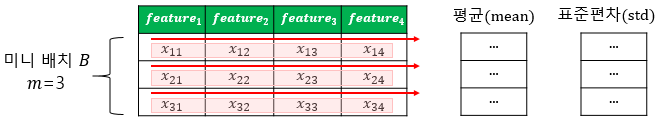

### 07) 케라스 Keras

1. 전처리

- Tokenizer() : 토큰화, 정수 인코딩

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


- pad_sequence() : 모든 샘플의 길이 동일하게 맞춤

  maxlen : 정규화할 길이

  padding : 'pre'는 앞에 0 채우고, 'post'는 뒤에 0 채운다.

In [9]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

2. 워드 임베딩 Word Embedding : 단어를 밀집 벡터로 만드는 작업

3. 모델링 Modeling

  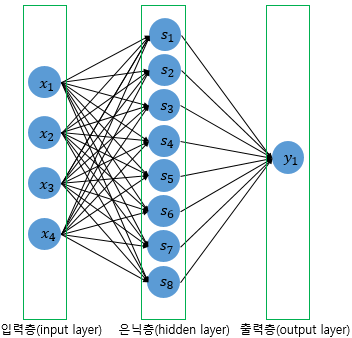

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu')) # 출력 뉴런 수, 입력 뉴런 수, 활성화 함수
model.add(Dense(1, activation='sigmoid')) # 출력층

4. 컴파일 Compile 과 훈련 Training

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) # metric : 훈련 모니터링 지표

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)) # 훈련 데이터의 20%를 검증 데이터로 사용

5. 평가 Evaluation 와 예측 Prediction

In [ ]:
model.evaluate(X_test, y_test, batch_size=32) # 평가

In [ ]:
model.predict(X_input, batch_size=32) # 예측

6. 모델 저장과 로드

In [ ]:
model.save("model_name.h5") # 저장

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("model_name.h5") # 로드

### 08) 케라스의 함수형 API

1. Sequential API로 만든 모델

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

2. Functional API로 만든 모델

- 전결합 피드 포워드 신경망

In [ ]:
inputs = Input(shape=(10,)) # 입력층
hidden1 = Dense(64, activation='relu')(inputs) # 은닉층
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2) # 출력층
model = Model(inputs=inputs, outputs=output)

- 선형 회귀

In [ ]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)

- 로지스틱 회귀

In [ ]:
inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

- 다중 입력 모델

In [ ]:
# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z)

- RNN(Recurrence Neural Network) 은닉층 사용

In [ ]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)

### 09) 케라스 서브클래싱 API

1. 서브클래싱 API로 구현한 선형 회귀

In [ ]:
import tensorflow as tf

class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred

model = LinearRegression()

X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)

2. 구현 방식 비교

- Sequential API

  장점 : 사용 간편

  단점 : 다수의 입력(multi-input), 다수의 출력(multi-output)을 가진 모델 또는 층 간의 연결(concatenate)이나 덧셈과 같은 연산을 하는 모델을 구현하기에는 적합하지 않다.

- Functional API

  장점 : Sequential API로는 구현하기 어려운 복잡한 모델 구현 가능

  단점 : 입력의 크기를 명시한 입력층을 모델의 앞단에 정의해줘야 한다.

- Subclassing API

  장점 : Functional API로도 구현할 수 없는 모델들 구현 가능

  단점 : 코드 사용이 까다롭다. 

### 10) 다층 퍼셉트론 MLP 으로 텍스트 분류

1. 다층 퍼셉트론 : 은닉층이 1개 이상 추가된 신경망

2. 케라스의 texts_to_matrix()

입력된 텍스트 데이터로부터 행렬 만드는 도구

- 모드 

  count : 단어 행렬 생성

  binary : 단어 존재 유무

  tfidf : TF-IDF 행렬

  freq : 각 단어의 등장횟수 / 각 문서의 모든 단어 개수의 합

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts) # 정수 인코딩
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [17]:
print(tokenizer.texts_to_matrix(texts, mode = 'count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


3. 20개 뉴스 그룹 데이터에 대한 이해

사이킷런에서 20개의 다른 주제 가진 18,846개의 뉴스 그룹 이메일 데이터 제공

In [18]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

newsdata = fetch_20newsgroups(subset = 'train')

print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [21]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [19]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [20]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [22]:
vocab_size = 10000 # 최대 단어 개수
num_classes = 20

def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

4. 다층 퍼셉트론을 사용하여 텍스트 분류

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 5s 50ms/step - loss: 2.2886 - accuracy: 0.3303 - val_loss: 0.9808 - val_accuracy: 0.8171
Epoch 2/5
80/80 [==============================] - 5s 58ms/step - loss: 0.8777 - accuracy: 0.7557 - val_loss: 0.4498 - val_accuracy: 0.8905
Epoch 3/5
80/80 [==============================] - 3s 40ms/step - loss: 0.4295 - accuracy: 0.8873 - val_loss: 0.3411 - val_accuracy: 0.9072
Epoch 4/5
80/80 [==============================] - 3s 40ms/step - loss: 0.2610 - accuracy: 0.9356 - val_loss: 0.3127 - val_accuracy: 0.9081
Epoch 5/5
80/80 [==============================] - 3s 41ms/step - loss: 0.1743 - accuracy: 0.9592 - val_loss: 0.2879 - val_accuracy: 0.9267
binary 모드의 테스트 정확도: 0.8312532901763916
Epoch 1/5
80/80 [==============================] - 5s 61ms/step - loss: 2.7425 - accuracy: 0.2544 - val_loss: 1.5573 - val_accuracy: 0.7553
Epoch 2/5
80/80 [==============================] - 3s 41ms/step - loss: 1.3987 - accuracy: 0.6409 - val_loss: 0.7138 - va

### 11) 피드 포워드 신경망 언어 모델 Neural Network Language Model, NNLM

1. 기존 N-gram 언어 모델의 한계

  희소 문제 : 충분한 데이터를 관측하지 못하면 언어를 정확히 모델링 하지 못한다.

2. 단어의 의미적 유사성

  단어의 의미적 유사성을 학습할 수 있도록 설계한다면 보다 정확한 예측이 가능하다. -> NNLM

3. 피드 포워드 신경망 언어 모델 NNLM

  n-gram 언어 모델처럼 다음 단어를 예측할 때 앞의 모든 단어를 참고하는 것이 아니라, 정해진 개수의 단어만을 참고

  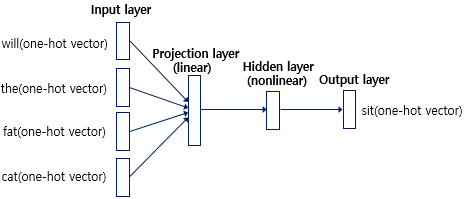

- 구조 : 4개의 원-핫 벡터 입력 -> 투사층 (가중치 행렬의 곱은 이루어지지만 활성화 함수가 존재하지 않는다.) -> 테이블 룩업 -> 임베딩 벡터 -> 모든 임베딩 벡터 연결 -> 은닉층 -> 출력층 (소프트 맥스, 벡터 각 원소는 0과 1 사이 값)

4. NNLM의 이점과 한계

- 기존 모델에서 개선점 : 단어 유사도 계산이 가능하며, 희소 문제를 해결하였다.

- 고정된 길이의 입력 : 정해진 n개의 단어 만 참고 가능하다. (RNN으로 극복)